<a href="https://colab.research.google.com/github/lake198/Study-AI/blob/main/%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Study_AI/DNN_code_colab_lesson_1_2')

In [ ]:
from common import functions
import numpy as np
import matplotlib.pyplot as plt

#[Section 1 入力層～中間層]

ニューラルネットワークは入力層、中間層、出力層から構成される。入力層は説明変数を受け取り、中間層は前の層の出力を受け取って内部で変換した結果を次の層に渡す。これを繰り返し、最終的な結果として出力層を得る。DNN（ディープニューラルネットワーク）は多層の中間層を持つニューラルネットワークを指す。\
\
<img src="https://drive.google.com/uc?export=view&id=1Cv_bGuNidxLe82QhGhoiDTFbZYj1DofF" width=50%>\
\
以降は上図のニューラルネットワークを用いる。入力層～中間層(1)
では、$M$ 個の説明変数を持つ入力データ ${\bf x}$ について、重みパラメータ $\bf w$ とバイアス $\bf b$ による線形結合 $\bf u$ を求める。以降では計算を一括で行えるように $b_i=w_{0i}$ として、バイアス $\bf b$ を重みパラメータ $\bf w$ に含めて考える。\
\
$$
{\bf u} = \left[\begin{array}{c}
w_{01}1 + w_{11}x_1+\cdots+w_{M1}x_M \\
\vdots \\
w_{0i}1 + w_{1i}x_1+\cdots+w_{Mi}x_M \\
\vdots \\
w_{0I}1 + w_{1I}x_1+\cdots+w_{MI}x_M \\
\end{array} \right]
=\left[\begin{array}{cccc}
  w_{01} & w_{11} & \cdots & w_{M1}\\
   & & \vdots\\
  w_{0i} & w_{0i} & \cdots & w_{Mi}\\
   & & \vdots\\
  w_{0I} & w_{0I} & \cdots & w_{MI}\\
\end{array} \right]
\left[\begin{array}{c}
  1 \\ x_{1} \\ \vdots \\ x_{M}\\
\end{array} \right] = {\bf w}^T{\bf x}\\
$$
\
i番目の要素のみ取り出すと\
\
$$ u_i=\sum_{m=0}^{M}w_{mi}x_m $$
\
ここで得られた $\bf u$ を活性化関数 $\phi$ で変換した結果 ${\bf y}=\phi({\bf u})$ が、中間層(1)の出力として次の中間層(2)に渡される。

# 確認テスト
<img src="https://drive.google.com/uc?export=view&id=1ZNLYzfQE7jOvjRuMPFpAlm9JZVpEWyCB" width=60%>


##[Section 1 実装演習]

In [ ]:
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3, 0], 
    [0.2, 0.3, 0.4, 0.5], 
    [0.3, 0.4, 0.5, 1],
])

print("W=", W, "\n")

# バイアス
b = np.array([0.1, 0.2, 0.3])
print("b=", b, "\n")

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print("x=", x, "\n")

#  総入力
u = np.dot(W, x) + b
print("u=", u, "\n")

# 中間層出力
z = functions.sigmoid(u)
print("z=", z)


W= [[0.1 0.2 0.3 0. ]
 [0.2 0.3 0.4 0.5]
 [0.3 0.4 0.5 1. ]] 

b= [0.1 0.2 0.3] 

x= [ 1.  5.  2. -1.] 

u= [1.8 2.2 2.6] 

z= [0.85814894 0.90024951 0.93086158]


#[Section 2 活性化関数]



中間層では受け取った入力 $\bf x$ に対する線形変換の結果 $\bf u$ に対して、非線形関数 $\phi$ による変換を行う。この関数 $\phi$ を活性化関数と呼ぶ。中間層で用いられる主な活性化関数として、ステップ関数、シグモイド関数、ReLU関数が挙げられる。ステップ関数は0か1の値しかとらないので線形分離可能なものしか学習できない。シグモイド関数は信号の強弱を伝えることができるが、層が深くなると勾配消失問題を引き起こす場合がある。ReLU関数は入力値が正の時は入力値をそのまま返し、負の時は0を返す非線形関数であり、勾配消失問題を回避することができる。


## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1QqY2C80wP5jXYFbCW63hj6GbhHfVg1AG" width=50%>








##[Section 2 実装演習]

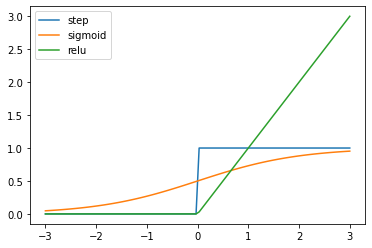

In [ ]:
# 活性化関数
def step(x):
  y = np.zeros(x.shape)
  y[x>=0] = 1
  return y

def sigmoid(x):
  return 1/(1+np.exp(-x))

def relu(x):
  y = np.array(x)
  y[y<0] = 0
  return y

x = np.linspace(-3, 3, 100)
y_step = step(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)

plt.plot(x, y_step, label="step")
plt.plot(x, y_sigmoid, label="sigmoid")
plt.plot(x, y_relu, label="relu")
plt.legend()
plt.show()

#[Section 3 出力層]

## 活性化関数
出力層の活性化関数は、回帰問題では恒等写像関数、2値分類問題ではシグモイド関数、多クラス分類問題ではソフトマックス関数が使われる。分類数が $K$ 個の多クラス分類では、ソフトマックス関数の出力値 $\bf y$ は、データ $\bf x$ が $k$ 番目 $(k=1,\cdots ,K)$ のクラスに分類される確率であり、0~1の範囲をとる。また出力値の合計は１となる。
## 誤差関数
ニューラルネットワークの学習においては、訓練データをモデルに入力して得られた結果 $\bf y^{(3)}$ と教師データ $\bf t$ との誤差 $E$（損失と呼ぶ）が最小となるように最適化を行う。\
\
回帰問題では損失関数として主に2乗誤差関数が用いられる。\
\
$$ E = \frac{1}{2}\sum_{k} \left( t_k - y^{(3)}_k \right)^2 = \frac{1}{2}{\|{\bf t - y^{(3)}} \|}^2 $$
\
分類問題では損失関数として交差エントロピー誤差が用いられる。\
2クラス分類（識別）問題の場合\
\
$$ E = -\sum_{k}\left(t_k\mathrm{log}\ y^{(3)}_k + (1-t_k)\mathrm{log}(1-y^{(3)}_k) \right)$$
\
多クラス分類問題の場合\
\
$$ E = -\sum_{k}t_k\mathrm{log}\ y^{(3)}_k $$

## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1RyLNQHpfFusWi4EYSbSGNiXvfhLNqia7" width=50%>


##[Section 3 実装演習]

In [ ]:
# 二乗誤差関数
def mean_squared_error(d, y):
  return np.sum((y-d)**2)

# 交差エントロピー誤差関数
def cross_entropy_error(d, y):
  # データ数が1の時、(1,K)に次元拡張 (K:分類数)
  if y.ndim == 1:
    y = y[None,:]
    d = d[None,:]
  # 教師データはOne-hot-vectorまたは正解ラベルインデックスのどちらかで表現される。
  # dの第2軸の要素数は正解ラベル表現の場合1,One-hot-vector表現の場合はKなので
  # dがOne-hot-vector表現の場合はdを正解ラベルインデックスに置き換え
  if y.shape[1] == d.shape[1]:
    d = d.argmax(axis=1)

  # データ数を取得
  batch_size = y.shape[0]

  # 交差エントロピーの計算においては、教師データの値は正解ラベルのみd=1,それ以外はd=0なので
  # ()式ではd=1の要素のみが残る
  y_true = y[np.arange(batch_size), d]

  # ここでは batch_size = Nなので、
  # y_true = y[:, d] としても同じ

  # y=0 の時、log_y が-∞に発散しないように微小量を足して各データの交差エントロピーを計算 
  En = - 1*np.log(y_true + delta)

  # 全体の交差エントロピーはEnの平均値として求まる
  E = np.mean(En)

  return E

# ソフトマックス関数
def softmax(x):
  # データ数が1の時、(1,K)に次元拡張 (K:分類数)
  if x.ndim == 1:
    x = x[:, None]
  # オーバーフロー対策
  x = x-np.max(x)
  return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)


#[Section 4 勾配降下法]

ニューラルネットワークを最適化するためには、目的関数である誤差関数 $L$ を最小化すればよい。今、与えられたパラメータ $w$ に対する関数 $L$ の勾配は $\frac{\partial L}{\partial w}$ で求められる。これに学習率 $\eta$ をかけた値を $w$ から引くことで、 Lが小さくなる方向に $w$ を更新することができる。このように勾配を用いてモデルを最適化する手法を勾配降下法と呼ぶ。\
\
勾配降下法は計算に全てのデータを用いるので、データ数に伴って計算コストも大きくなる。これに対し、パラメータの更新にランダムに抽出したサンプルの誤差を用いる場合を確率的勾配降下法と呼び、ランダムに分割したデータ集合の平均誤差を用いる場合をミニバッチ勾配降下法と呼ぶ。

## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1o2sxwZlUWr2M4qXO_766WnTynRatgRch" width=50%>







\
<img src="https://drive.google.com/uc?export=view&id=18IfjmDvb1np5MWgJnXIdXr_4-FaU8IYg" width=50%>


##[Section 4 実装演習]

##### 結果表示 #####


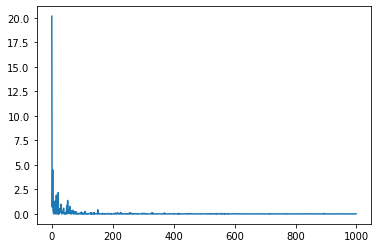

In [ ]:
# サンプルとする関数
def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)

plt.plot(lists, losses)
# グラフの表示
plt.show()

# Section5: 誤差逆伝搬法

上図ニューラルネットワークの出力層(3)について考えると、\
\
$$\begin{eqnarray}
u^{(3)}_{k} &=& \sum_{j=0}^{J}w^{(3)}_{kj}y^{(2)}_{j}\\
y^{(3)}_{k} &=& \phi^{(3)}(u^{(3)}_k)
\end{eqnarray}$$
\
勾配降下法でモデルを最適化するために損失関数 $E_k$ を $\bf w^{(3)}$ で偏微分すると、$y^{(3)}_k=\phi(u^{(3)}_k)$ なので\
\
$$\begin{eqnarray}
\frac{\partial E}{\partial {\bf w}^{(3)}_k}
&=& \frac{\partial E}{\partial y^{(3)}_k}
    \frac{\partial \phi^{(3)} (u^{(3)}_k)}{\partial u^{(3)}_k}
    \frac{\partial u^{(3)}_k}{\partial {\bf w}^{(3)}_k}\\[8pt]
\end{eqnarray}$$
\
ここで\
$$
d^{(3)}_k=\frac{\partial E}{\partial y^{(3)}_k} \phi'^{(3)}(u^{(3)}_k)
$$
\
と置換すると\
\
$$\begin{eqnarray}
\frac{\partial E}{\partial {\bf w}^{(3)}_k} = 
d^{(3)}_k \frac{\partial u^{(3)}_k}{\partial {\bf w}^{(3)}_k}
&=&\left(d^{(3)}_k \frac{\partial u^{(3)}}{\partial w_{k0}}, \  
       d^{(3)}_k \frac{\partial u^{(3)}}{\partial w_{k1}}, \ \cdots,\ 
       d^{(3)}_k \frac{\partial u^{(3)}}{\partial w_{kJ}} \right)\\[8pt]
&=& (d^{(3)}_ky^{(2)}_0,\ d^{(3)}_ky^{(2)}_1,\ \cdots,\ d^{(3)}_ky^{(2)}_J)\\
\end{eqnarray}$$
\
$k=1, 2, \cdots ,K$ なので\
\
$$
\frac{\partial {\bf E}}{\partial {\bf w^{(3)}}}
= \left[\begin{array}{cccc}
  d^{(3)}_1 y^{(2)}_0 & d^{(3)}_1 y^{(2)}_1 & \cdots & d^{(3)}_1 y^{(2)}_J\\
  d^{(3)}_2 y^{(2)}_0 & d^{(3)}_2 y^{(2)}_1 & \cdots & d^{(3)}_2 y^{(2)}_J\\
  \vdots \\
  d^{(3)}_K y^{(2)}_0 & d^{(3)}_K y^{(2)}_1 & \cdots & d^{(3)}_K y^{(2)}_J\\  \end{array} \right]
={\bf d^{(3)}}\cdot{\bf y^{(2)}}
$$
\
次に中間層(2)におけるパラメータ $\bf w^{(2)}$ の更新のため、損失関数 $E$ を $\bf w^{(2)}$ で偏微分すると\
\
$$
\frac{\partial E}{\partial {\bf w}^{(2)}_j}
= \frac{\partial E}{\partial {\bf y}^{(3)}}
\frac{\partial {\bf y}^{(3)}}{\partial {\bf u}^{(3)}}
\frac{\partial {\bf u}^{(3)}}{\partial y^{(2)}_j}
\frac{\partial y^{(2)}_j}{\partial u^{(2)}_j}
\frac{\partial u^{(2)}_j}{\partial {\bf w}^{(2)}_j}
$$
\
ここで\
\
$$
\frac{\partial {\bf u}^{(3)}}{\partial y^{(2)}_j}
=\frac{\partial}{\partial y^{(2)}_j}
\left[\begin{array}{c}
w^{(3)}_{10}y^{(2)}_0 + w^{(3)}_{11}y^{(2)}_1+\cdots+w^{(3)}_{1J}y^{(2)}_J \\
\vdots \\
w^{(3)}_{k0}y^{(2)}_0 + w^{(3)}_{k1}y^{(2)}_1+\cdots+w^{(3)}_{kJ}y^{(2)}_J \\
\vdots \\
w^{(3)}_{K0}y^{(2)}_0 + w^{(3)}_{K1}y^{(2)}_1+\cdots+w^{(3)}_{KJ}y^{(2)}_J \\
\end{array} \right]\
=\sum_kw^{(3)}_{kj}
$$
\
なので\
$$\begin{eqnarray}
\frac{\partial E}{\partial {\bf w}^{(2)}_j}
&=&\left( \sum_k d^{(3)}_k w^{(3)}_{kj} \right)\phi'^{(2)}(u^{(2)}_j) 
\frac{\partial u^{(2)}_j}{\partial {\bf w}^{(2)}_j} \\[8pt]
&=& d^{(2)}_j \frac{\partial u^{(2)}_j}{\partial {\bf w}^{(2)}_j}
,\quad d^{(2)}_j=\left(\sum_{k}d^{(3)}_kw^{(3)}_{kj}\right)\phi'^{(2)}(u^{(2)}_j) \\[8pt]
&=&\left(d^{(2)}_jy^{(1)}_0,\ d^{(2)}_jy^{(1)}_1,\ \cdots,\ d^{(2)}_jy^{(1)}_I \right)
\end{eqnarray}$$
\
$j=0, 1, \cdots ,J$ を考えると\
\
$$
\frac{\partial E}{\partial {\bf w^{(2)}}}={\bf d^{(2)}}\cdot{\bf y^{(1)}}
$$
\
中間層(1)についても同様に考える事ができて\
\
$$
\frac{\partial E}{\partial {\bf w^{(1)}}}={\bf d^{(1)}}\cdot{\bf x}
\ ,\quad d^{(1)}_i=\left(\sum_{j}d^{(2)}_jw^{(2)}_{ji}\right)\phi'^{(1)}(u^{(1)}_i)
$$
\
一連の計算から各層における $E$ の勾配は、出力層における $E$ の微分を出力層からその層まで順に伝搬させた結果である言える。\
\
ここで出力層における $d_k$ （肩括弧は省略）を導出する。\
回帰問題において、損失関数に2乗誤差関数、活性化関数に恒等関数 $\phi(u) = u$ を用いると、$\phi'(u) = 1$ なので、\
\
$$\begin{eqnarray}
d_k
&=& \frac{\partial E}{\partial y_k} \phi'(u_k) \\[8pt]
&=& \frac{\partial}{\partial y_k}
\left(\frac{1}{2}\sum_{k}{(t_k - y_k)}^2 \right) \cdot 1 \\[8pt]
&=& y_k - t_k
\end{eqnarray}$$
\
2クラス分類問題では、損失関数に交差エントロピー誤差関数、活性化関数にシグモイド関数 $\phi(u) = 1/\{1+\mathrm{exp}(-u)\}$ を用いると、$\phi'(u) = \phi(u)(1-\phi(u))$ なので、\
\
$$\begin{eqnarray}
d_k
&=& -\frac{\partial}{\partial y_k}
\left(\sum_{k} t_k\mathrm{log}\ y_k + (1-t_k)\mathrm{log}(1-y_k) \right)
\cdot \phi'(u_k)\\[8pt]
&=& -\left( \frac{t_k}{y_k} - \frac{1-t_k}{1-y_k} \right) \cdot \phi'(u_k) \\[8pt]
&=& - \frac{t_k(1-y_k)-y_k(1-t_k)}{y_k(1-y_k)}\cdot y_k(1-y_k) \\[4pt]
&=& y_k-t_k
\end{eqnarray}$$
\
多クラス分類問題では、損失関数に交差エントロピー誤差関数、活性化関数にソフトマックス関数 $\phi(u) = \mathrm{exp}(u_k)/\sum_{k}\mathrm{exp}(u_k)$ を用いると、\
\
$$\begin{eqnarray}
E = -\sum_{l=1}^{K} t_l \mathrm{log}(y_l)
=-\sum_{l=1}^K t_l \mathrm{log}\left( \frac{\mathrm{exp}(u_l)}{\sum_{l'}\mathrm{exp}(u_{l'})} \right)
=-\sum_{l=1}^K \left( t_l u_l - t_l \mathrm{log}\sum_{l'}\mathrm{exp}(u_{l'}) \right)\\[10pt]
d_k = \frac{\partial E}{\partial u_k}
= -t_k + \sum_{l=1}^K \left(t_l \frac{\mathrm{exp}(u_k)}{\sum_{l'}\mathrm{exp}(u_{l'})} \right)
= y_k\sum_{l=1}^K t_l-t_k = y_k-t_k
\quad \left(\because \sum_{l=1}^K t_l = 1 \right)
\end{eqnarray}$$
\
まとめると\
\
$$\begin{align}
& \frac{\partial E}{\partial \bf w}^{(l)} = {\bf d}^{(l)}\cdot{\bf y}^{(l-1)}\\[8pt]
& d^{(l)}_i = \begin{cases}
  y^{(l)}_i-t^{(l)}_i & (\mbox{if } l \mbox{ is output layer}) \\[8pt]
  \left(\sum_{j}d^{(l+1)}_jw^{(l+1)}_{ji}\right)\phi{'}^{(l)}(u^{(l)}_i) & (\mbox{otherwise})
\end{cases}
\end{align}$$


## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1BYUCwMkIvVOIN6Ljuoyuy-uYsfDU_Vyf" width=50%>


##[Section 5 実装演習]

データ読み込み完了


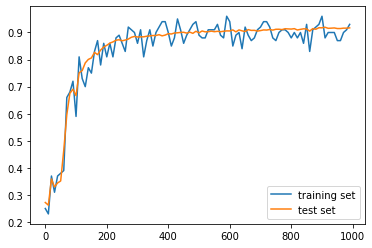

In [ ]:
import numpy as np
from data.mnist import load_mnist
import pickle

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01 # 変更してみよう
#入力層サイズ
input_layer_size = 784 # 変更してみよう
#中間層サイズ
hidden_layer_size = 40 # 変更してみよう
#出力層サイズ
output_layer_size = 10 # 変更してみよう
# 繰り返し数
iters_num = 1000 # 変更してみよう
# ミニバッチサイズ
batch_size = 100 # 変更してみよ
# 学習率
learning_rate = 0.1 # 変更してみよう
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_size, output_layer_size)
    # 試してみよう_Xavierの初期値
    # network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
    # network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
    # 試してみよう Heの初期値
    # network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    # network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)

    network['b1'] = np.zeros(hidden_layer_size)
    network['b2'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2  = network['b1'], network['b2']
        
    u1 =  np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 =  np.dot(z1, W2) + b2
    y = functions.softmax(u2)
 
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']    
    # 出力層でのデルタ
    delta2 = functions.d_softmax_with_loss(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]
    
    z1, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
# plt.title("正答率")
# グラフの表示
plt.show()